In [218]:
import numpy as np
import matplotlib.pyplot as plt

In [219]:
n = 10
trial = 10000
q_star = np.random.normal(0, 1, n)
additional_q_star = np.random.normal(0, 0.01, (trial, n))

after_q_star = q_star + np.sum(additional_q_star, axis=0)

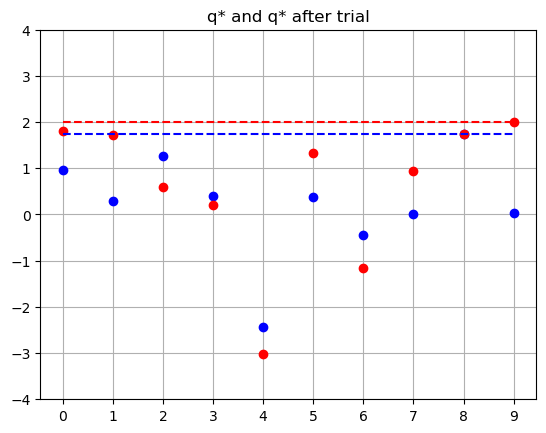

In [220]:
plt.plot(q_star, 'bo')
plt.plot(after_q_star, 'ro')
plt.plot(range(0, n), max(q_star) * np.ones(n), 'b--')
plt.plot(range(0, n), max(after_q_star) * np.ones(n), 'r--')

plt.title('q* and q* after trial')
plt.ylim(-4, 4)
plt.xticks(range(0, n))
plt.grid()
plt.show()

In [221]:
def bandit_v1(q_star, epsilon, trial, select_type):    
    q_star = q_star.copy()
    n = len(q_star)
    Q = np.zeros(n)
    N = np.zeros(n)

    action_log = []
    reward_log = []

    for step in range(trial):
        if epsilon < np.random.random():
            a = np.argmax(Q)
            action_log.append(a)
        else:
            a = np.random.randint(n)
            action_log.append(a)
        
        r = np.random.normal(q_star[a], 1)
        reward_log.append(r)
        N[a] += 1
        if select_type==1: Q[a] += (r-Q[a]) / N[a]
        if select_type==2: Q[a] += (r-Q[a]) * 0.1

        q_star += additional_q_star[step]
    
    return action_log, reward_log

In [222]:
a1, r1 = bandit_v1(q_star, 0, trial, 1)
a2, r2 = bandit_v1(q_star, 0.1, trial, 1)
a3, r3 = bandit_v1(q_star, 0.01, trial, 1)

a4, r4 = bandit_v1(q_star, 0, trial, 2)
a5, r5 = bandit_v1(q_star, 0.1, trial, 2)
a6, r6 = bandit_v1(q_star, 0.01, trial, 2)

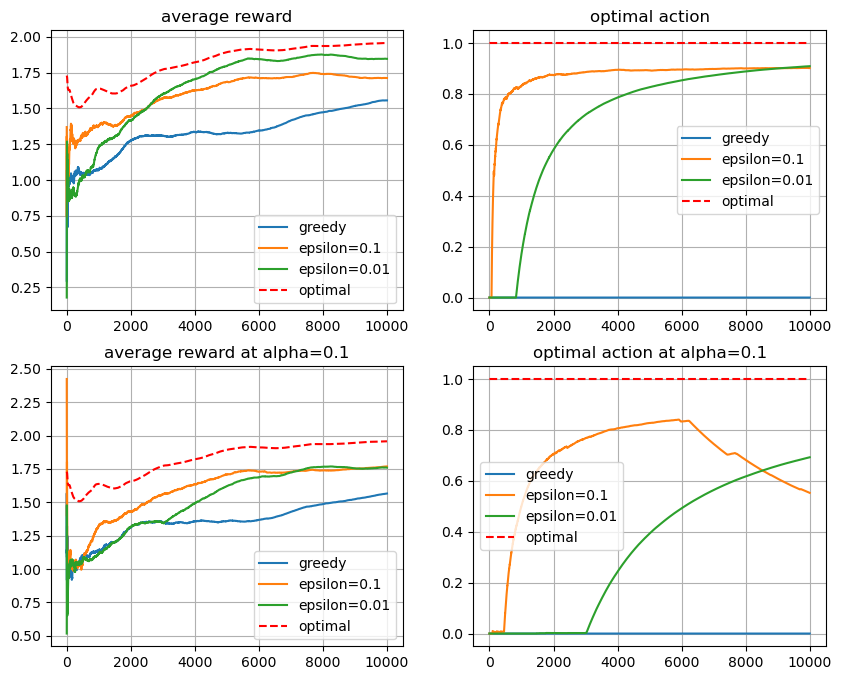

In [223]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0][0].plot(np.cumsum(r1) / np.arange(1, trial+1))
ax[0][0].plot(np.cumsum(r2) / np.arange(1, trial+1))
ax[0][0].plot(np.cumsum(r3) / np.arange(1, trial+1))
ax[0][0].plot(np.cumsum(np.max(q_star + np.cumsum(additional_q_star, axis=0), axis=1)) / np.arange(1, trial+1), 'r--')

ax[0][0].set_title('average reward')
ax[0][0].legend(['greedy', 'epsilon=0.1', 'epsilon=0.01', 'optimal'])
ax[0][0].grid()

ax[0][1].plot(np.cumsum(np.array(a1) == np.argmax(q_star)) / np.arange(1, trial+1))
ax[0][1].plot(np.cumsum(np.array(a2) == np.argmax(q_star)) / np.arange(1, trial+1))
ax[0][1].plot(np.cumsum(np.array(a3) == np.argmax(q_star)) / np.arange(1, trial+1))
ax[0][1].plot(np.ones(trial), 'r--')

ax[0][1].set_title('optimal action')
ax[0][1].legend(['greedy', 'epsilon=0.1', 'epsilon=0.01', 'optimal'])
ax[0][1].grid()

ax[1][0].plot(np.cumsum(r4) / np.arange(1, trial+1))
ax[1][0].plot(np.cumsum(r5) / np.arange(1, trial+1))
ax[1][0].plot(np.cumsum(r6) / np.arange(1, trial+1))
ax[1][0].plot(np.cumsum(np.max(q_star + np.cumsum(additional_q_star, axis=0), axis=1)) / np.arange(1, trial+1), 'r--')

ax[1][0].set_title('average reward at alpha=0.1')
ax[1][0].legend(['greedy', 'epsilon=0.1', 'epsilon=0.01', 'optimal'])
ax[1][0].grid()

ax[1][1].plot(np.cumsum(np.array(a4) == np.argmax(q_star)) / np.arange(1, trial+1))
ax[1][1].plot(np.cumsum(np.array(a5) == np.argmax(q_star)) / np.arange(1, trial+1))
ax[1][1].plot(np.cumsum(np.array(a6) == np.argmax(q_star)) / np.arange(1, trial+1))
ax[1][1].plot(np.ones(trial), 'r--')

ax[1][1].set_title('optimal action at alpha=0.1')
ax[1][1].legend(['greedy', 'epsilon=0.1', 'epsilon=0.01', 'optimal'])
ax[1][1].grid()

plt.show()